In [1]:
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.metrics import confusion_matrix
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
nltk.download('vader_lexicon')
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vinitkanani/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# import data
data = pd.read_csv('data/training.csv', encoding="ISO-8859-1", header=None)
data.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

In [4]:
data.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


In [5]:
# Missing Values
data.isnull().sum()

sentiment    0
id           0
date         0
query        0
user         0
text         0
dtype: int64

In [6]:
# data cleaning
# Normalizing the value
data['sentiment'] = data['sentiment'].replace(0, -1)
data['sentiment'] = data['sentiment'].replace(4, 1)

print("Number of http links", data['text'].str.count('http').sum())
data['text'] = data['text'].str.replace(r'http\S+|www.\S+', '', case=False, regex=True)

print("Number of @ mentions", data['text'].str.count('@').sum())
data['text'] = data['text'].str.replace(r'@\S+', '', case=False, regex=True)

print("Number of # mentions", data['text'].str.count('#').sum())
data['text'] = data['text'].str.replace(r'#\S+', '', case=False, regex=True)

print("Number of RT", data['text'].str.count('RT').sum())
data['text'] = data['text'].str.replace(r'RT', '', case=False, regex=True)

Number of http links 71635
Number of @ mentions 798628
Number of # mentions 45133
Number of RT 0


In [7]:
# Compare sentiment with TextBlob
def get_polarity_textblob(text):
    return TextBlob(text).sentiment.polarity

In [8]:
data['polarity_textblob'] = data['text'].apply(get_polarity_textblob)

In [9]:
data['polarity_textblob_num'] = data['polarity_textblob'].apply(lambda x: 1 if x > 0 else -1)

In [10]:
def get_confusion_matrix(data, actual_column, predicted_column):
    cm = confusion_matrix(data[actual_column], data[predicted_column], normalize='true')
    labels = [f'{v:.2%}' for v in cm.flatten()]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    plt.show()

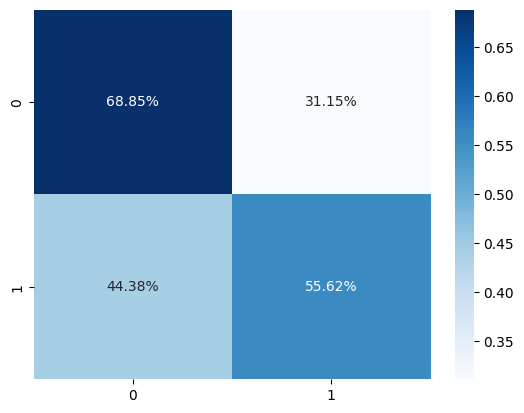

In [11]:
get_confusion_matrix(data, 'sentiment', 'polarity_textblob_num')

In [12]:
(data['sentiment'] == data['polarity_textblob_num']).mean()

0.622356875

In [15]:
pd.set_option('display.max_colwidth', None)
false_pred = data[data['sentiment'] != data['polarity_textblob_num']]
print(false_pred.head(3))

   sentiment          id                          date     query  \
0         -1  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
2         -1  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3         -1  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user  \
0  _TheSpecialOne_   
2         mattycus   
3          ElleCTF   

                                                                               text  \
0    - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D   
2   I dived many times for the ball. Managed to save 50%  The rest go out of bounds   
3                                   my whole body feels itchy and like its on fire    

   polarity_textblob  polarity_textblob_num  
0           0.216667                      1  
2           0.500000                      1  
3           0.200000                      1  


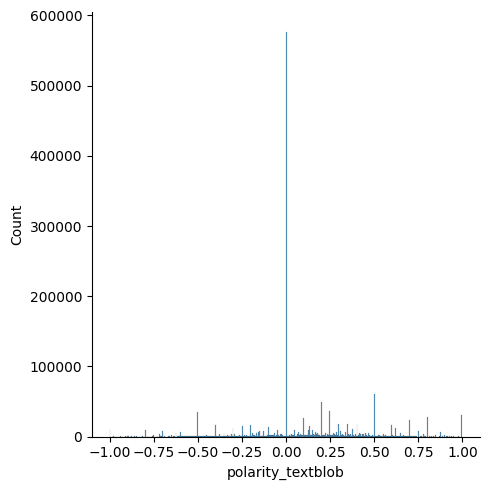

In [16]:
sns.displot(data['polarity_textblob'])

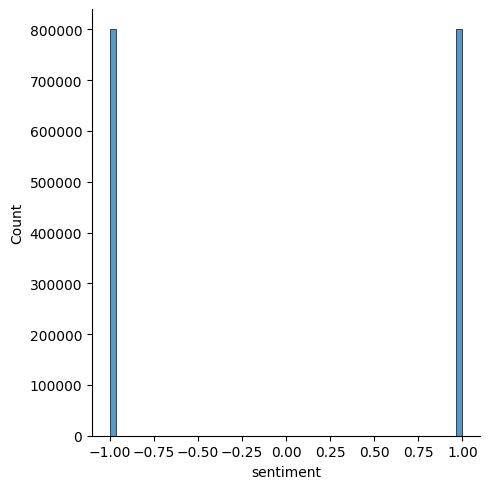

In [17]:
sns.displot(data['sentiment'])

In [18]:
print("Wrong classification in comparison to TextBlob", (data['polarity_textblob'] == 0).mean()*100, "%")

Wrong classification in comparison to TextBlob 35.888999999999996 %


In [19]:
# Comparing with nltk

# load the nltk model
nltk_model = SentimentIntensityAnalyzer()


# create a function to get the polarity
def get_polarity_nltk(text):
    return nltk_model.polarity_scores(text)['compound']

In [21]:
data['polarity_nltk'] = data['text'].apply(get_polarity_nltk)
data['polarity_nltk_num'] = data['polarity_nltk'].apply(lambda x: 1 if x > 0 else -1)

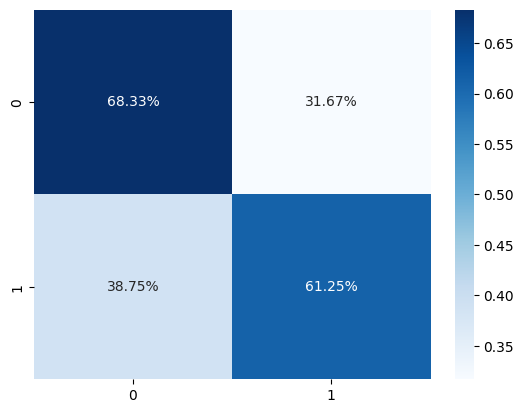

In [22]:
get_confusion_matrix(data, 'sentiment', 'polarity_nltk_num')

In [25]:
def get_word_cloud(text):
    word_cloud = WordCloud().generate(text)
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.show()

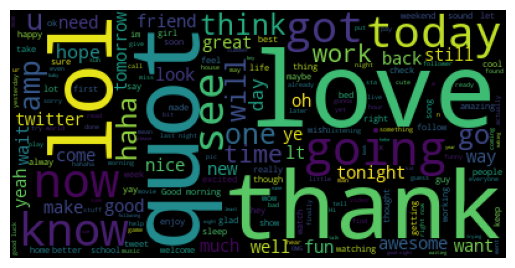

In [26]:
get_word_cloud(data[data['sentiment'] == 1]['text'].str.cat(sep=' '))

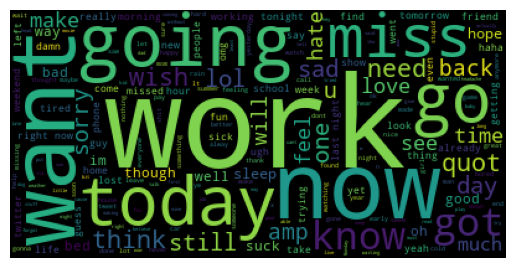

In [27]:
get_word_cloud(data[data['sentiment'] == -1]['text'].str.cat(sep=' '))